In [8]:
import pandas as pd

df = pd.read_csv('earthquake_data_tsunami.csv')

# Просмотр первых нескольких строк, чтобы удостовериться, что данные загружены
print(df.head())


   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  


# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('path_to_your_dataset.csv')  # Путь к скачанному CSV с Kaggle

In [9]:
# Краткий осмотр данных
print(df.head())
print(df.shape)
print(df.info())

   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  
(782, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst      

In [10]:
# Краткое описание предметной области
print("Датасет содержит данные о землетрясениях и связных с ними рисках цунами по всему миру.")
print("Включает атрибуты: магнитуда, глубина, координаты, время, индикаторы цунами и т.д.")

Датасет содержит данные о землетрясениях и связных с ними рисках цунами по всему миру.
Включает атрибуты: магнитуда, глубина, координаты, время, индикаторы цунами и т.д.


In [11]:
# Статистика по атрибутам
print(df.describe())

        magnitude         cdi         mmi          sig         nst  \
count  782.000000  782.000000  782.000000   782.000000  782.000000   
mean     6.941125    4.333760    5.964194   870.108696  230.250639   
std      0.445514    3.169939    1.462724   322.465367  250.188177   
min      6.500000    0.000000    1.000000   650.000000    0.000000   
25%      6.600000    0.000000    5.000000   691.000000    0.000000   
50%      6.800000    5.000000    6.000000   754.000000  140.000000   
75%      7.100000    7.000000    7.000000   909.750000  445.000000   
max      9.100000    9.000000    9.000000  2910.000000  934.000000   

             dmin         gap       depth    latitude   longitude  \
count  782.000000  782.000000  782.000000  782.000000  782.000000   
mean     1.325757   25.038990   75.883199    3.538100   52.609199   
std      2.218805   24.225067  137.277078   27.303429  117.898886   
min      0.000000    0.000000    2.700000  -61.848400 -179.968000   
25%      0.000000   14.6

In [12]:
# Пропущенные значения
print(df.isnull().sum())

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


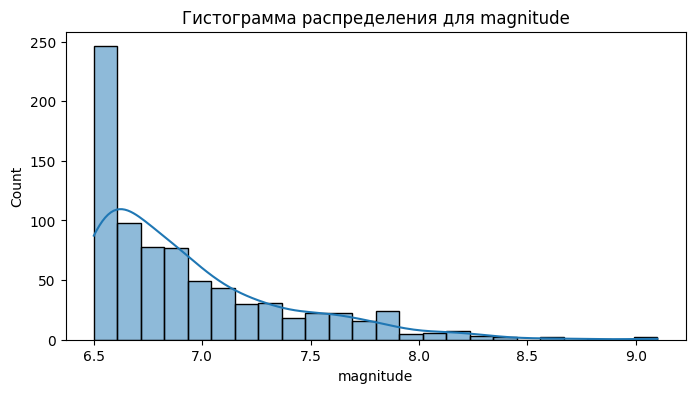

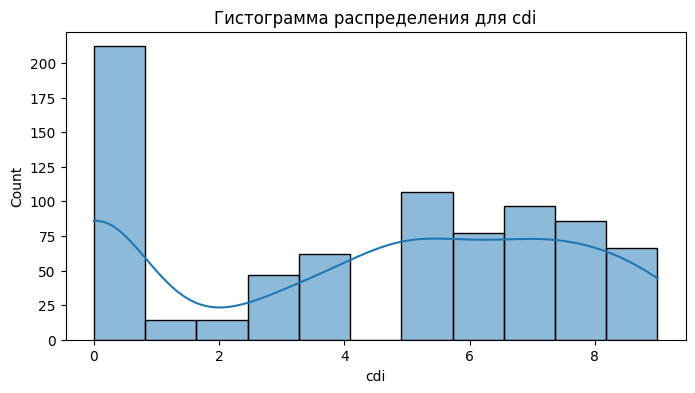

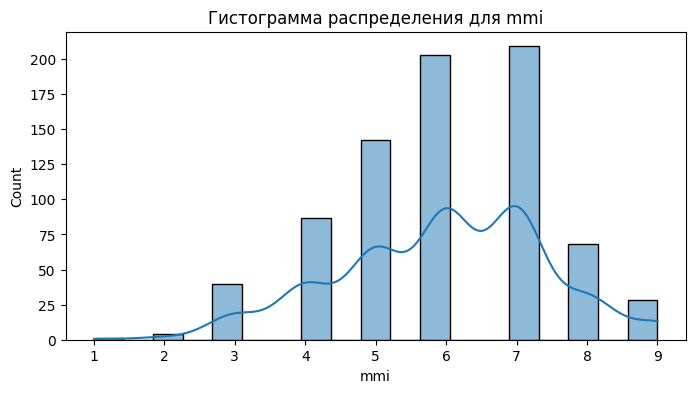

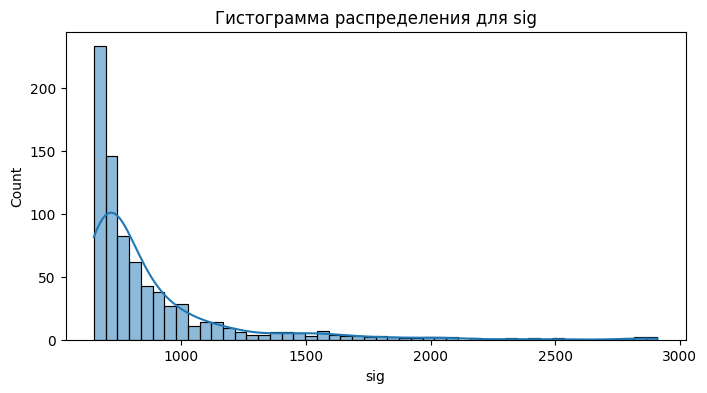

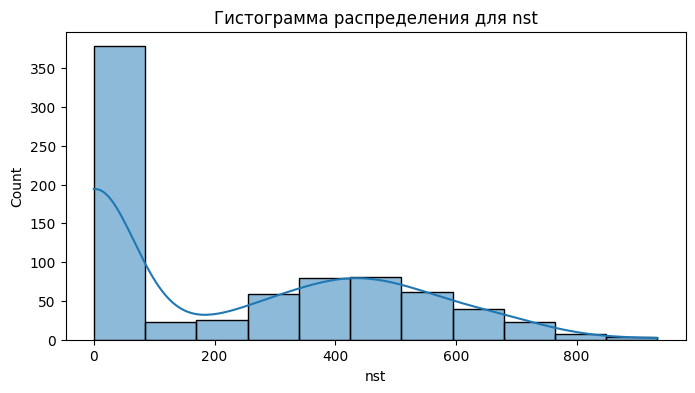

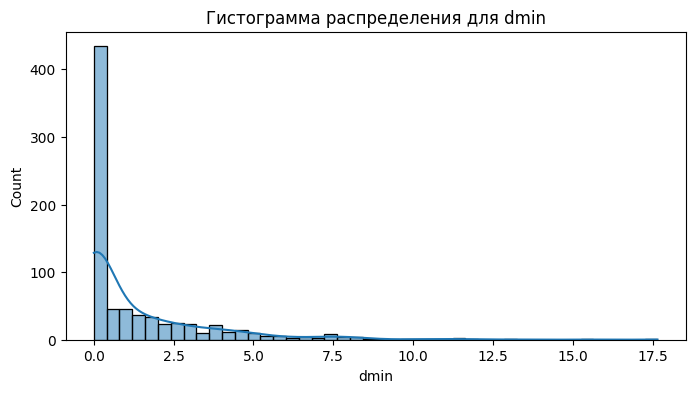

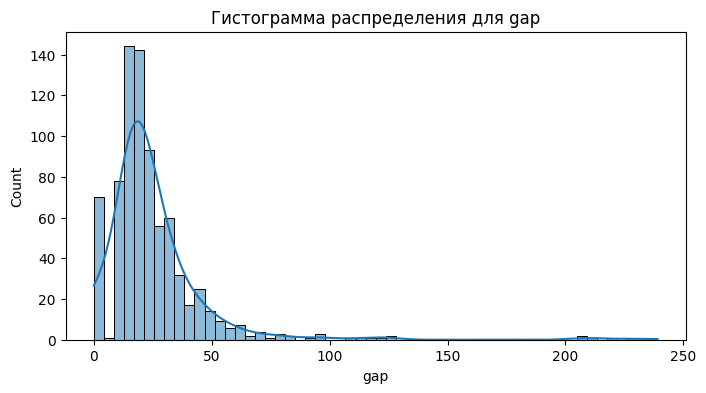

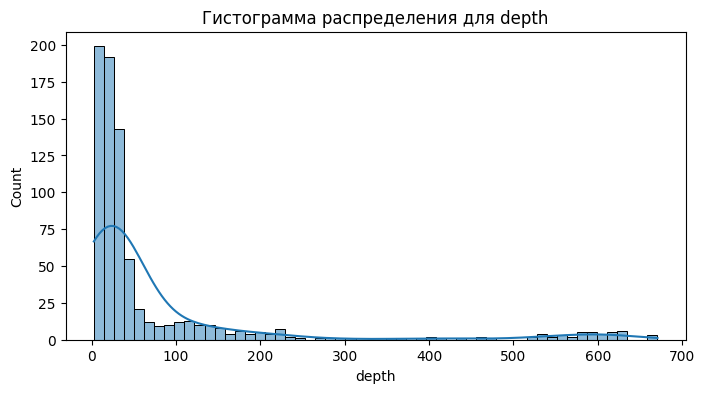

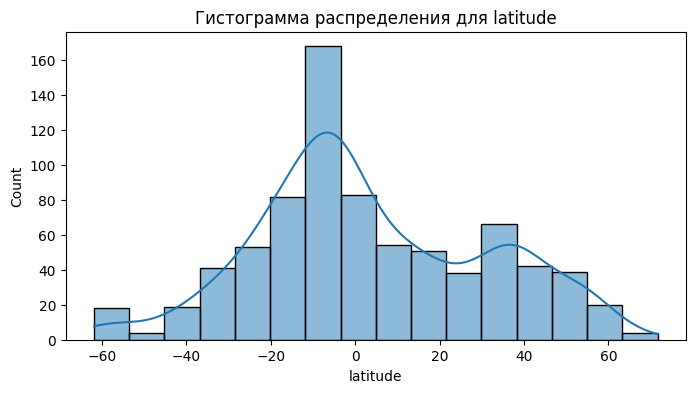

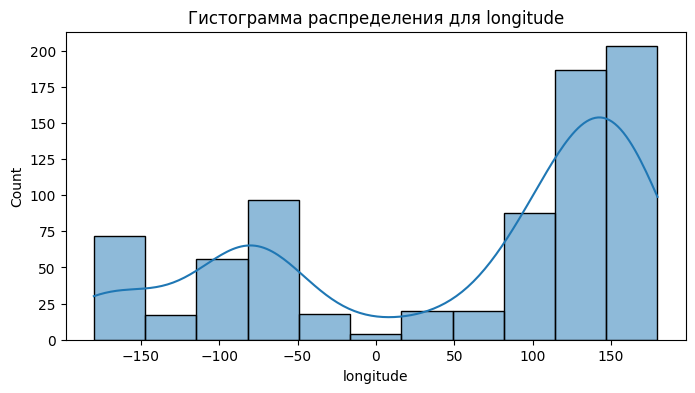

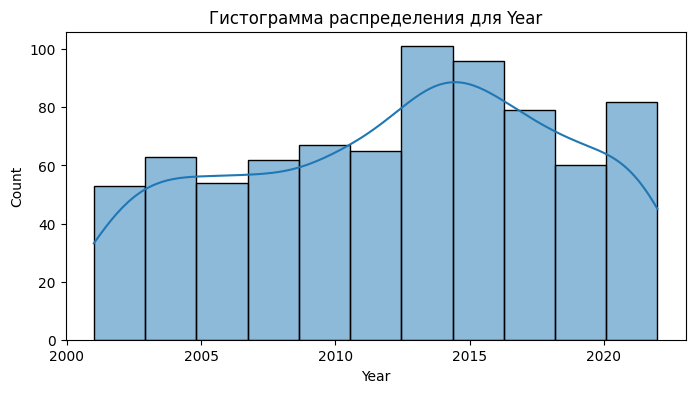

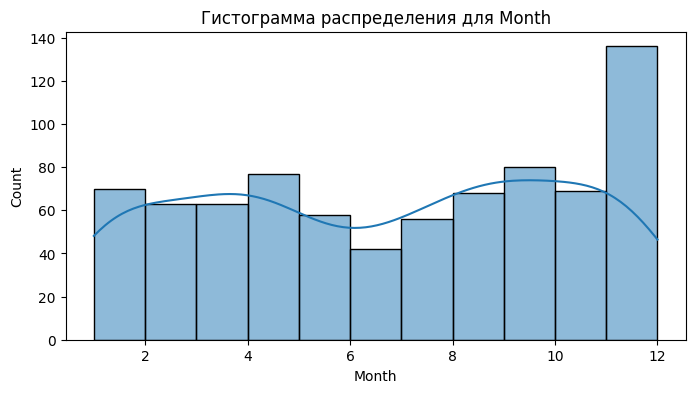

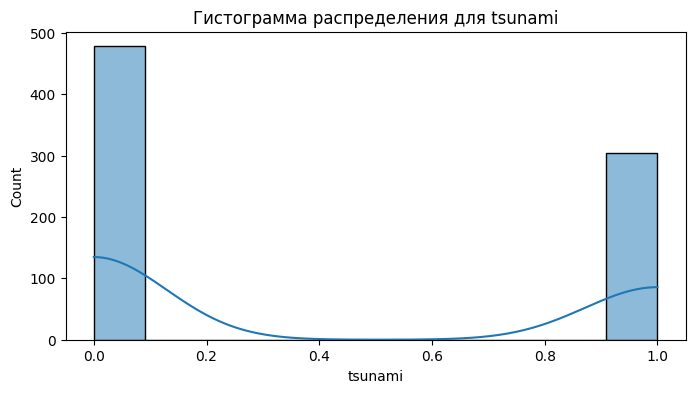

In [13]:
# Гистограммы для числовых атрибутов
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Гистограмма распределения для {col}')
    plt.show()

In [14]:
# Заполнение пропусков средним значением (пример)
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [15]:
# Корреляция
corr_matrix = df[num_cols].corr()
print(corr_matrix)

           magnitude       cdi       mmi       sig       nst      dmin  \
magnitude   1.000000  0.209549  0.285552  0.515871  0.113114 -0.091403   
cdi         0.209549  1.000000  0.317937  0.479788 -0.175417  0.006554   
mmi         0.285552  0.317937  1.000000  0.442423  0.160417 -0.299074   
sig         0.515871  0.479788  0.442423  1.000000 -0.030100 -0.095318   
nst         0.113114 -0.175417  0.160417 -0.030100  1.000000 -0.529371   
dmin       -0.091403  0.006554 -0.299074 -0.095318 -0.529371  1.000000   
gap        -0.110626  0.098143 -0.015723  0.114285 -0.118812 -0.021933   
depth       0.030644 -0.097891 -0.504439 -0.088667 -0.121982  0.168546   
latitude   -0.008552  0.129003  0.144883  0.204306  0.144204 -0.238377   
longitude  -0.013911 -0.149048 -0.005803 -0.190132  0.173665 -0.097875   
Year       -0.057083  0.423158 -0.212855  0.124439 -0.688602  0.529449   
Month      -0.011926  0.007002 -0.035238 -0.029189 -0.014021  0.037502   
tsunami    -0.004726  0.160266 -0.1473

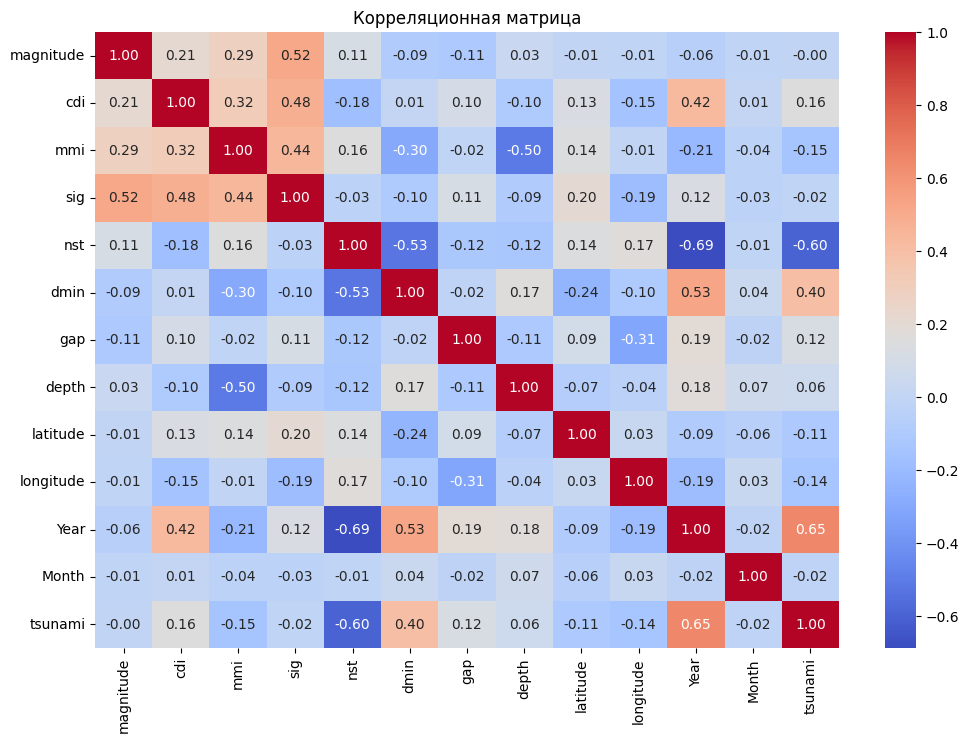

In [16]:
# Визуализация корреляции
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

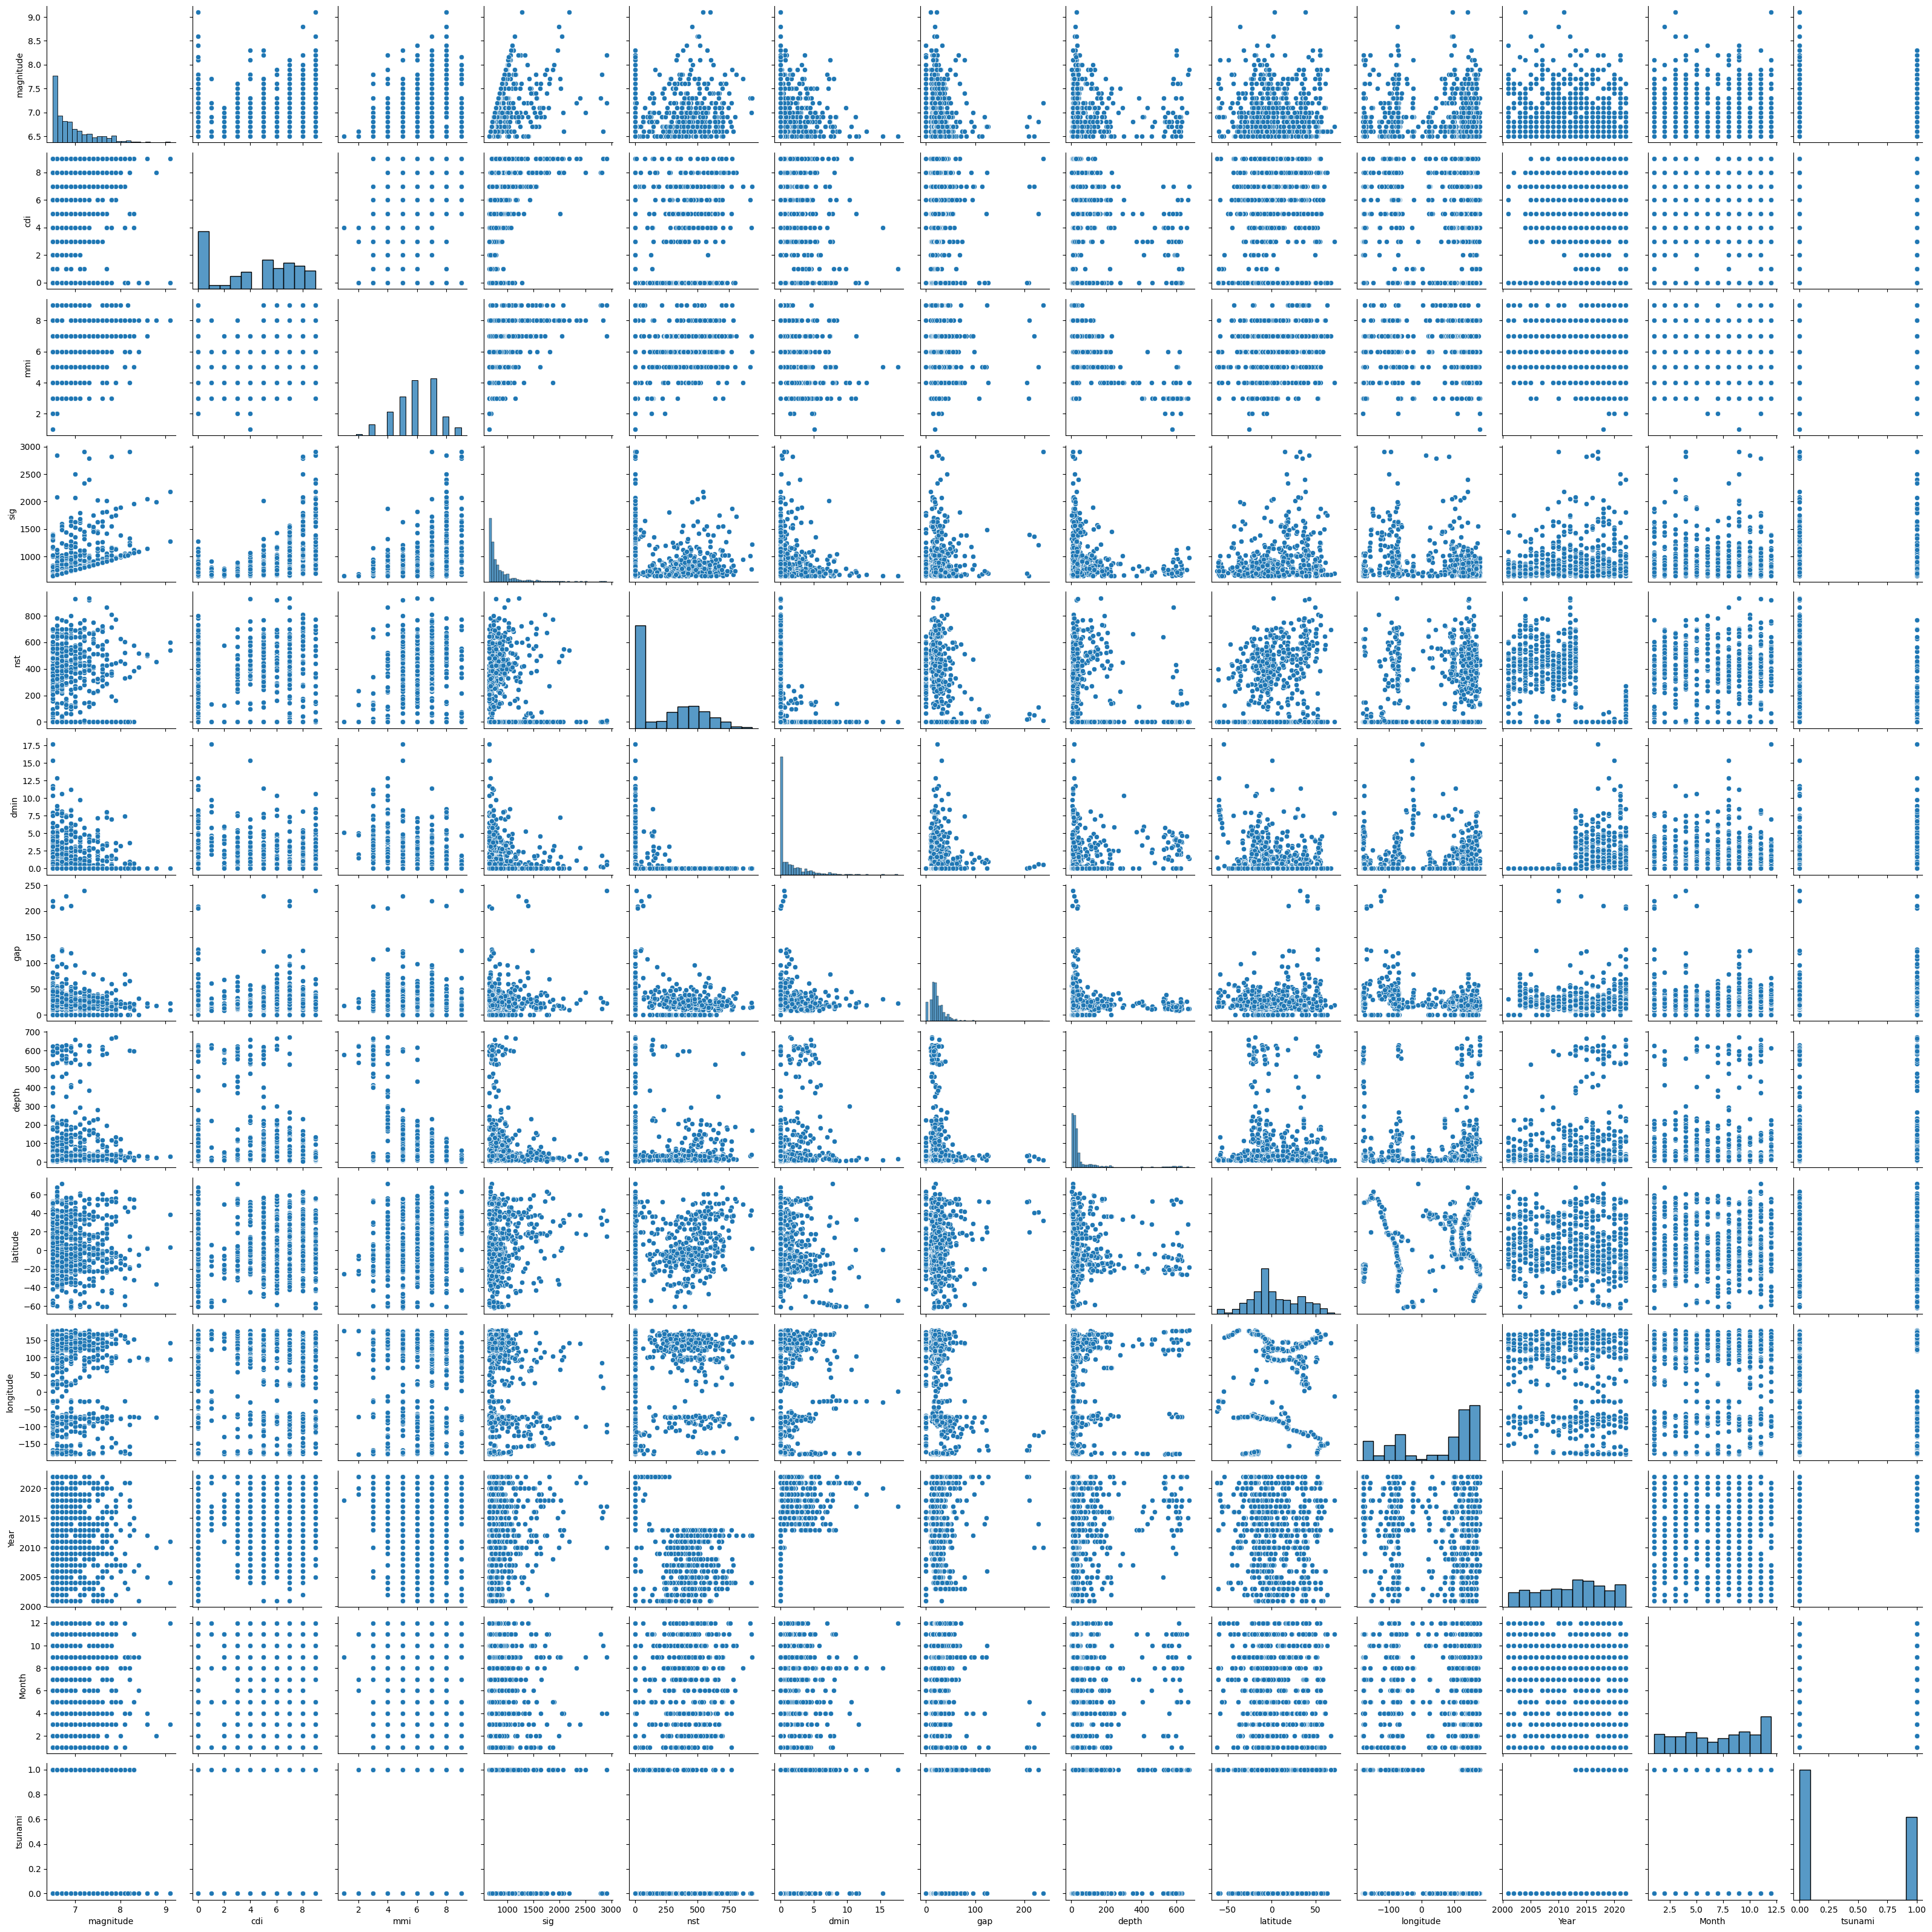

In [17]:
# Матрица диаграмм рассеяния
sns.pairplot(df[num_cols].dropna())
plt.show()